# Alkım's CS210 Project: Credit Card Balance Analysis

**Aim of the Project**: 

In my project for this class, I will analyze my own financial data from my Akbank credit card from July 2023 until December 2023. 


I want to dive deeper into my spending habits and see how it changes from month to month, for each category. I will also be determining whether I spend in chunks, or a lot in smaller quantities. 

With a machine learning model, I will predict my spending, and the category of my spending.

**Data Used for the Project**: 
The data is semi-hand extracted. There are two datasets, one being the categorized data extracted from Akbank Banking application, and the other is my detailed spending, also labeled with categories. Detailed spending data includes almost all expenses, with their amounts and the place it was spent in.

Due to private nature of my data, only the categorical spending dataset .csv is available on github repository.

The categorized dataset has months as index, and categories as columns. 
Initial **Columns for Categorical Data are**: 
* Food and Entertainment
*  Groceries
*  Electronics
*  Health and Care
*  Education and Hobbies
*  Clothes
*  Transportation and Travel
*  Fuel
*  Services
*  Home and Decor

In each cell there is the amount of my spending in Turkish liras for each category, each month. 

The detailed spending dataset has initially the columns below:
* Date
* Category
* Corporation
* Amount


## Importing the Libraries and Reading Data Files

## Data Preparation and Exploration for categorical.csv

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
categorical_df = pd.read_csv("categorical.csv")
categorical_df

,Ay/Kategori,Yemek ve Eğlence,Market,Elektronik,Sağlık ve Bakım,Eğitim ve Hobi,Giyim,Ulaşım ve Seyahat,Akaryakıt,Hizmet,Ev ve Dekorasyon
0,Aralık,"8953,7","4586,02",2809,"1797,79","1572,96","1385,99",0,113,0,0
1,Kasım,"7490,7","2425,48",0,1000,"1194,97","1892,17",119,3056,"553,5","80,15"
2,Ekim,13420,2475,0,116,1443,2093,1806,1295,0,0
3,Eylül,6740,3398,0,2157,133,0,2286,4557,0,0
4,Ağustos,8125,2328,0,0,129,1105,1997,0,0,0
5,Temmuz,12180,9712,0,1035,168,1693,217,0,0,0


#### Translating the Column Names and Row Indexes

In [3]:
categorical_df = categorical_df.rename({"Ay/Kategori":"Date",
                                        "Yemek ve Eğlence": "Food and Entertainment",
                                        "Market":"Groceries",
                                        "Elektronik":"Electronics",
                                        "Sağlık ve Bakım":"Health and Care",
                                        "Eğitim ve Hobi":"Education and Hobbies",
                                        "Giyim":"Clothes",
                                        "Ulaşım ve Seyahat":"Transportation and Travel",
                                        "Akaryakıt":"Fuel",
                                        "Hizmet":"Services",
                                        "Ev ve Dekorasyon":"Home and Decor"
                                       }, axis='columns')

In [4]:
en_months=["December","November","October","September","August","July"]
categorical_df["Date"]=en_months

Converting "months" to datetime

In [5]:
from datetime import datetime
year=2023

categorical_df['Date'] = categorical_df['Date'].apply(lambda x: datetime.strptime(
    f"{x} {year}","%B %Y"))


In [6]:
categorical_df.set_index("Date",inplace=True)
categorical_df.head()

,Food and Entertainment,Groceries,Electronics,Health and Care,Education and Hobbies,Clothes,Transportation and Travel,Fuel,Services,Home and Decor
Date,,,,,,,,,,
2023-12-01,"8953,7","4586,02",2809,"1797,79","1572,96","1385,99",0,113,0,0
2023-11-01,"7490,7","2425,48",0,1000,"1194,97","1892,17",119,3056,"553,5","80,15"
2023-10-01,13420,2475,0,116,1443,2093,1806,1295,0,0
2023-09-01,6740,3398,0,2157,133,0,2286,4557,0,0
2023-08-01,8125,2328,0,0,129,1105,1997,0,0,0


### Exploring the categorical data

Checking for missing values

In [7]:
categorical_df.isnull().sum()

Food and Entertainment       0
Groceries                    0
Electronics                  0
Health and Care              0
Education and Hobbies        0
Clothes                      0
Transportation and Travel    0
Fuel                         0
Services                     0
Home and Decor               0
dtype: int64

Since there are no null values in our dataset, we don't have to bother trying to "handle" missing values. Moving on to next step...

In [8]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2023-12-01 to 2023-07-01
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Food and Entertainment     6 non-null      object
 1   Groceries                  6 non-null      object
 2   Electronics                6 non-null      int64 
 3   Health and Care            6 non-null      object
 4   Education and Hobbies      6 non-null      object
 5   Clothes                    6 non-null      object
 6   Transportation and Travel  6 non-null      int64 
 7   Fuel                       6 non-null      int64 
 8   Services                   6 non-null      object
 9   Home and Decor             6 non-null      object
dtypes: int64(3), object(7)
memory usage: 528.0+ bytes


At this point, I have encountered a value error when trying to convert all columns to float. This resulted from the usage of commas in floating number. This is probably why we have "object" as datatype for some columns, and "int64" for others.

Now, let's replace that.

In [9]:
categorical_df = categorical_df.replace(',', '.', regex=True).astype(float)
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2023-12-01 to 2023-07-01
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Food and Entertainment     6 non-null      float64
 1   Groceries                  6 non-null      float64
 2   Electronics                6 non-null      float64
 3   Health and Care            6 non-null      float64
 4   Education and Hobbies      6 non-null      float64
 5   Clothes                    6 non-null      float64
 6   Transportation and Travel  6 non-null      float64
 7   Fuel                       6 non-null      float64
 8   Services                   6 non-null      float64
 9   Home and Decor             6 non-null      float64
dtypes: float64(10)
memory usage: 528.0 bytes


### Categorical Data Visualization

Total Spending Histogram for Each Month

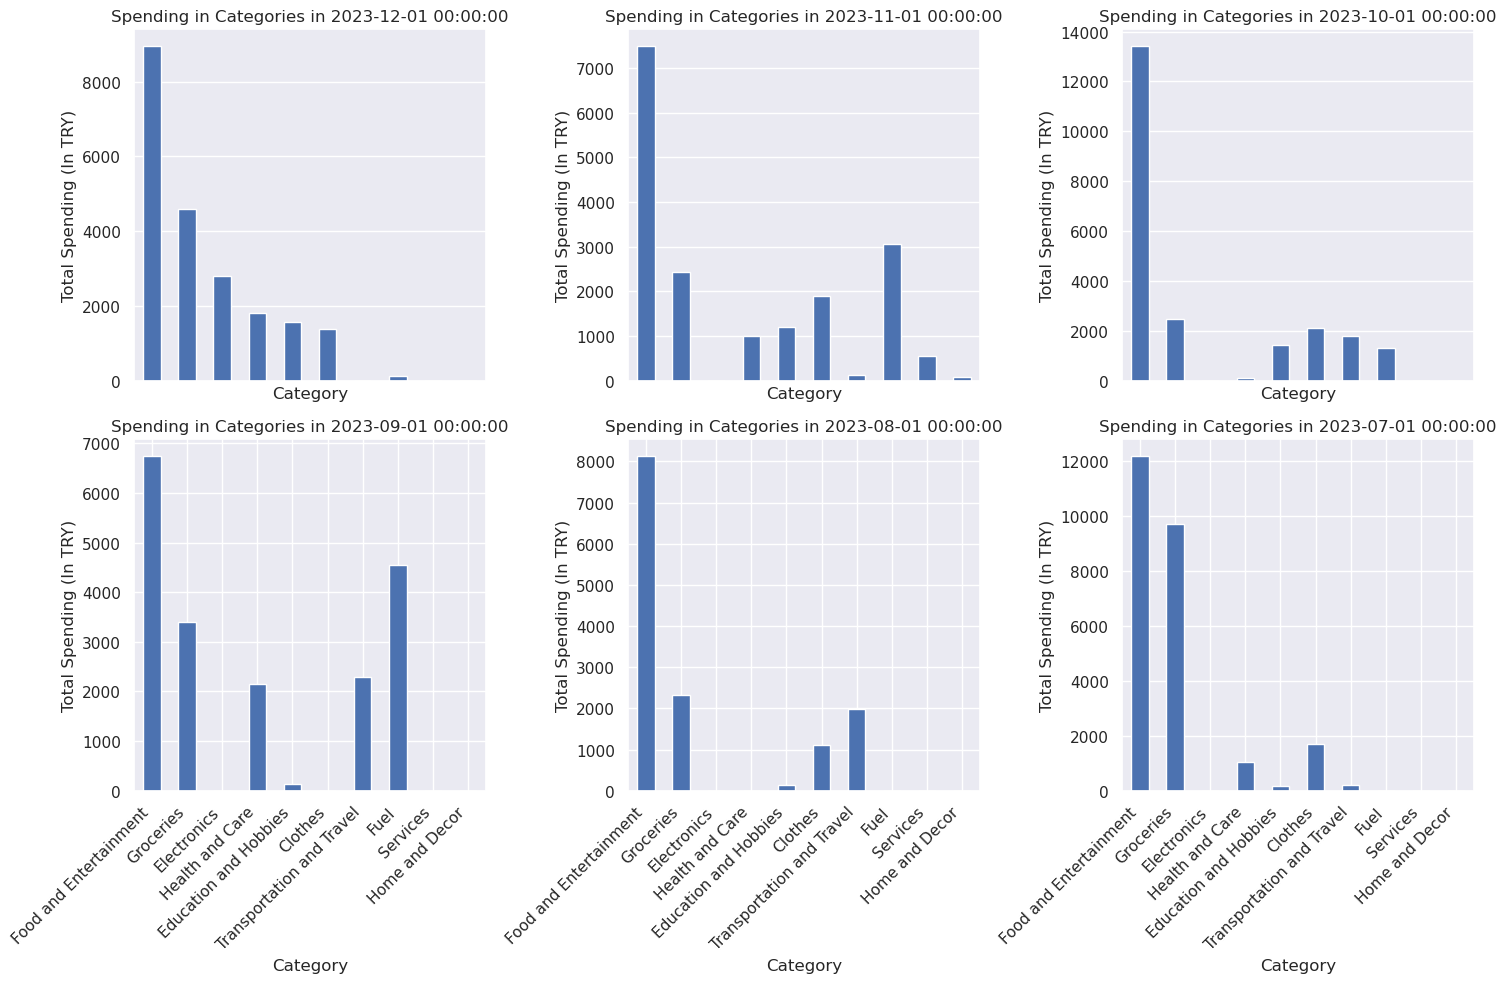

In [10]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, month in enumerate(categorical_df.index):
    categorical_df.loc[month].plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Spending in Categories in {month}')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Total Spending (In TRY)')

    if i // 3 == 1:  # Display xticks only on the bottom row
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    else:
        axes[i].set_xticks([])  

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

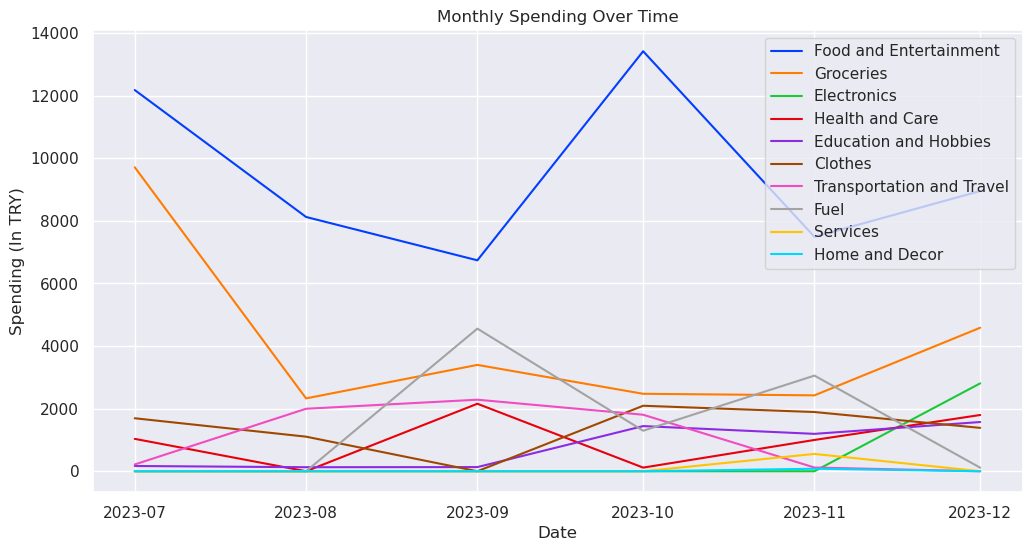

In [11]:
plt.figure(figsize=(12, 6))
#For consistent coloring of the categories
colors = sns.color_palette("bright", n_colors=len(categorical_df.columns)) 

for i, column in enumerate(categorical_df.columns[:]):
    sns.lineplot(x=categorical_df.index,y=column, data=categorical_df,label=column,color=colors[i])
plt.title('Monthly Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Spending (In TRY)')
plt.legend()
plt.show()


Plot without the "Food and Entertainment" and "Groceries" column to see other categories clearer.

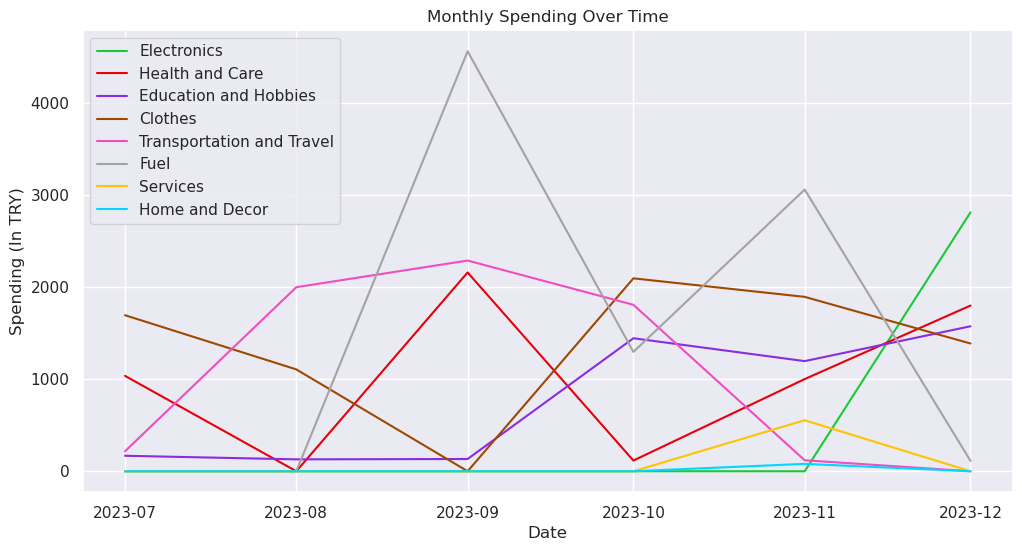

In [12]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(categorical_df.columns[2:]):
    sns.lineplot(x=categorical_df.index,y=column, data=categorical_df,label=column,color=colors[i+2])
plt.title('Monthly Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Spending (In TRY)')
plt.legend()
plt.show()

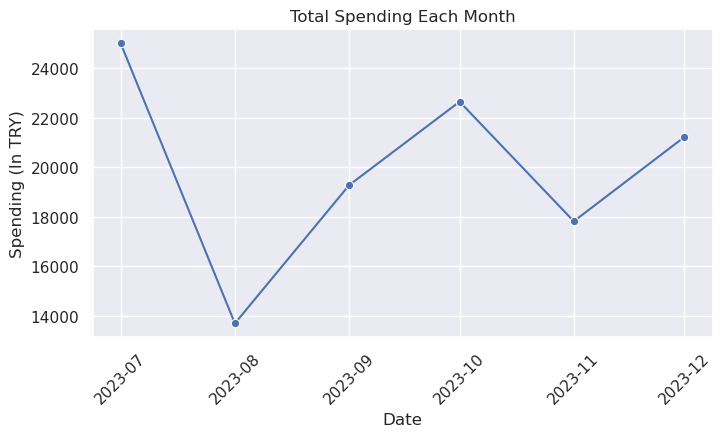

In [13]:
total_spending_per_month=categorical_df.sum(axis=1)
categorical_df["Month_Total"]=total_spending_per_month
plt.figure(figsize=(8, 4))
sns.lineplot(x=categorical_df.index, y=total_spending_per_month, marker='o')
plt.xlabel('Date')
plt.ylabel('Spending (In TRY)')
plt.title('Total Spending Each Month')

plt.xticks(rotation=45)
plt.show()

In [14]:
categorical_df

,Food and Entertainment,Groceries,Electronics,Health and Care,Education and Hobbies,Clothes,Transportation and Travel,Fuel,Services,Home and Decor,Month_Total
Date,,,,,,,,,,,
2023-12-01,8953.7,4586.02,2809.0,1797.79,1572.96,1385.99,0.0,113.0,0.0,0.00,21218.46
2023-11-01,7490.7,2425.48,0.0,1000.00,1194.97,1892.17,119.0,3056.0,553.5,80.15,17811.97
2023-10-01,13420.0,2475.00,0.0,116.00,1443.00,2093.00,1806.0,1295.0,0.0,0.00,22648.00
2023-09-01,6740.0,3398.00,0.0,2157.00,133.00,0.00,2286.0,4557.0,0.0,0.00,19271.00
2023-08-01,8125.0,2328.00,0.0,0.00,129.00,1105.00,1997.0,0.0,0.0,0.00,13684.00
2023-07-01,12180.0,9712.00,0.0,1035.00,168.00,1693.00,217.0,0.0,0.0,0.00,25005.00


# Data Preparation Exploration for detailed_spending.csv

In [15]:
detailed_df = pd.read_csv("detailed_spending.csv")
detailed_df = detailed_df.dropna()
detailed_df = detailed_df.drop(columns=["Sayı"])
detailed_df.sample(n=5)

,Tarih,Tür,Kurum,Miktar
71,Eylül,Yemek ve Eğlence,COCO CHEF,₺173
55,Ekim,Market,MASAL TEKEL,₺157
74,Eylül,Yemek ve Eğlence,SIMIT SARAYI,₺102
54,Ekim,Market,KOZMIK TURIZM,₺510
102,Ağustos,Ulaşım ve Seyahat,PEGASUS,"₺1,068"


Translating the dataframe like the other one

In [16]:
detailed_df = detailed_df.rename({
                                  "Tarih":"Date",
                                  "Tür":"Category",
                                  "Kurum":"Corporation",
                                  "Miktar":"Amount"
                                       }, axis='columns')

In [17]:
detailed_df["Amount"] = detailed_df["Amount"].str[1:] #Gets rid of the TRY signs
detailed_df["Amount"] = detailed_df["Amount"].replace(',', '', regex=True).astype(float)

In [18]:
detailed_df = detailed_df.replace("Yemek ve Eğlence","Food and Entertainment")
detailed_df = detailed_df.replace("Market","Groceries")
detailed_df = detailed_df.replace("Sağlık ve Bakım","Health and Care")
detailed_df = detailed_df.replace("Eğitim ve Hobi","Education and Hobbies")
detailed_df = detailed_df.replace("Giyim","Clothes")
detailed_df = detailed_df.replace("Ulaşım ve Seyahat","Transportation and Travel")
detailed_df = detailed_df.replace("Akaryakıt","Fuel")
detailed_df = detailed_df.replace("Hizmet","Services")
detailed_df = detailed_df.replace("Elektronik","Electronics")
detailed_df = detailed_df.replace("Ev ve Dekorasyon","Home and Decor")

detailed_df = detailed_df.replace("Aralık","December")
detailed_df = detailed_df.replace("Kasım","November")
detailed_df = detailed_df.replace("Ekim","October")
detailed_df = detailed_df.replace("Eylül","September")
detailed_df = detailed_df.replace("Ağustos","August")
detailed_df = detailed_df.replace("Temmuz","July")

In [19]:
detailed_df['Date'] = detailed_df['Date'].apply(lambda x: datetime.strptime(
    f"{x} {year}","%B %Y"))

In [20]:
detailed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 0 to 121
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         122 non-null    datetime64[ns]
 1   Category     122 non-null    object        
 2   Corporation  122 non-null    object        
 3   Amount       122 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.8+ KB


In [21]:
detailed_df.sample(n=5)

,Date,Category,Corporation,Amount
23,2023-11-01,Food and Entertainment,FİL,581.0
87,2023-09-01,Groceries,BP MARKET,70.0
116,2023-07-01,Groceries,GETİR,1251.0
54,2023-10-01,Groceries,KOZMIK TURIZM,510.0
119,2023-07-01,Groceries,BEK PASTA,112.0


## Data Visualization for Detailed Spending

### Creating the final dataframe "df", and adding "Corporation_Total" and "Corporation_Category" Columns

Corporation Category Mappings:

**0: normal**(below 2000 TRY in total spent)

**1: regular** (above 2000 TRY in total spent)

**2: favorite** (above 5000 TRY in total spent)

In [22]:
corporation_totals = detailed_df.groupby('Corporation')['Amount'].sum().reset_index().sort_values(by="Amount", ascending=False)

df = pd.merge(detailed_df, corporation_totals, on='Corporation', how='left', suffixes=('', '_Total'))
df = df.rename(columns={'Amount_Total': 'Corporation_Total'})
df.sample(n=5)

,Date,Category,Corporation,Amount,Corporation_Total
42,2023-10-01,Food and Entertainment,TRENDYOL,1299.0,7528.0
2,2023-12-01,Food and Entertainment,LA PLAGE,1072.0,1072.0
5,2023-12-01,Food and Entertainment,STARBUCKS,525.0,4322.0
40,2023-10-01,Food and Entertainment,NEBU TURIZM,7128.0,7128.0
45,2023-10-01,Food and Entertainment,THE HUNGER,425.0,425.0


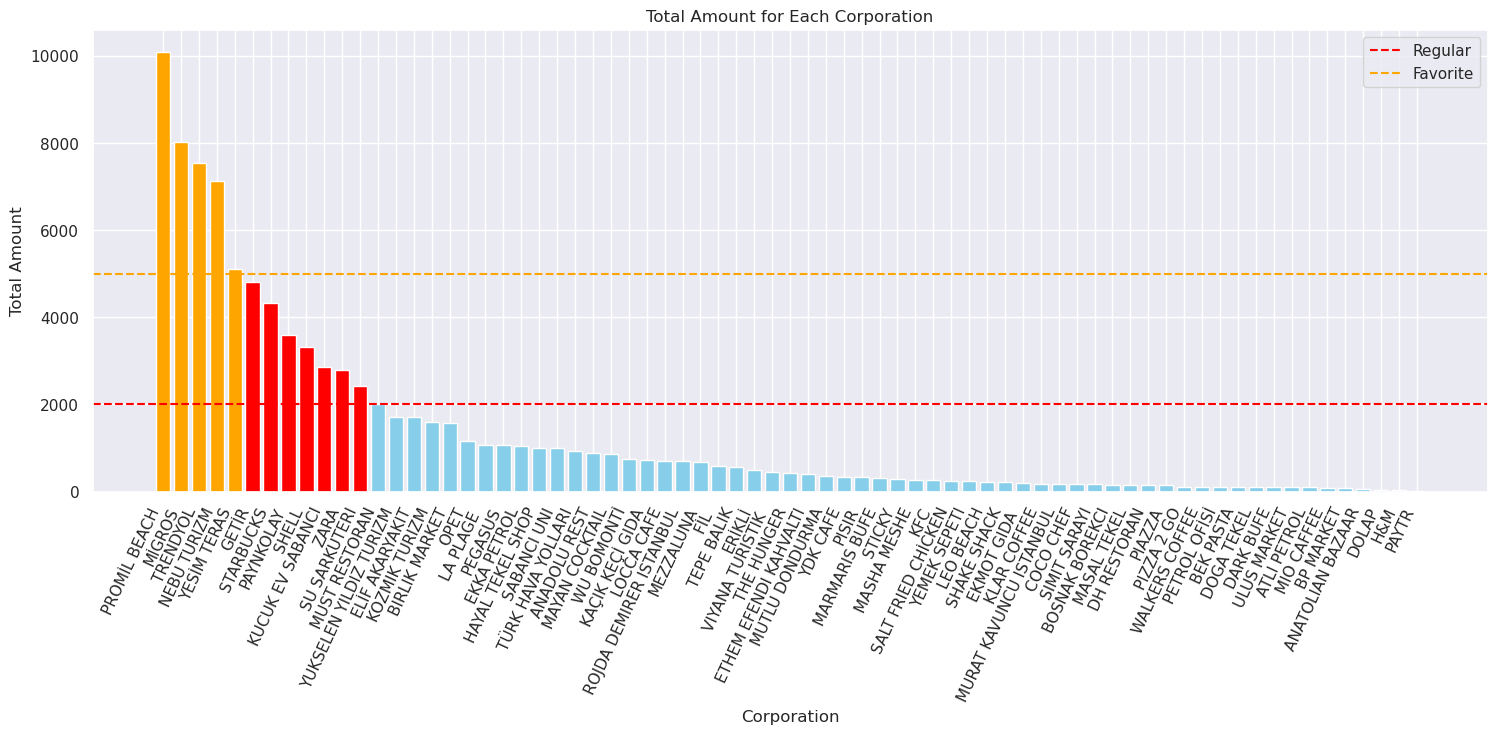

In [23]:
threshold_regular = 2000 
threshold_favorite = 5000

plt.figure(figsize=(18, 6))

colors = ['orange' if amount > threshold_favorite else 'red' if amount > threshold_regular else 'skyblue' for amount in corporation_totals['Amount']]
df['Corporation_Category'] = pd.cut(df['Corporation_Total'], bins=[-float('inf'), threshold_regular, threshold_favorite, float('inf')], labels=[0, 1, 2])

bars = plt.bar(corporation_totals['Corporation'], corporation_totals['Amount'], color=colors)
plt.xlabel('Corporation')
plt.ylabel('Total Amount')
plt.title('Total Amount for Each Corporation')
plt.xticks(rotation=65, ha='right')

plt.axhline(y=threshold_regular, color='red', linestyle='--', label='Regular')
plt.axhline(y=threshold_favorite, color='orange', linestyle='--', label='Favorite')

plt.legend()

plt.show()

In [24]:
df.sample(n=5)

,Date,Category,Corporation,Amount,Corporation_Total,Corporation_Category
40,2023-10-01,Food and Entertainment,NEBU TURIZM,7128.0,7128.0,2
50,2023-10-01,Food and Entertainment,SABANCI UNI,147.0,999.0,0
88,2023-08-01,Food and Entertainment,YESİM TERAS,5115.0,5115.0,2
89,2023-08-01,Food and Entertainment,PROMİL BEACH,1745.0,10092.0,2
112,2023-07-01,Food and Entertainment,YUKSELEN YILDIZ TURIZM,110.0,1702.0,0


In [25]:
monthly_spending = df.groupby('Date')['Amount'].sum().reset_index()
monthly_spending

,Date,Amount
0,2023-07-01,22557.0
1,2023-08-01,12331.0
2,2023-09-01,14645.0
3,2023-10-01,17487.0
4,2023-11-01,12395.0
5,2023-12-01,12402.0


### Visualizing and Comparing Total Monthly Spending in Two Dataframes


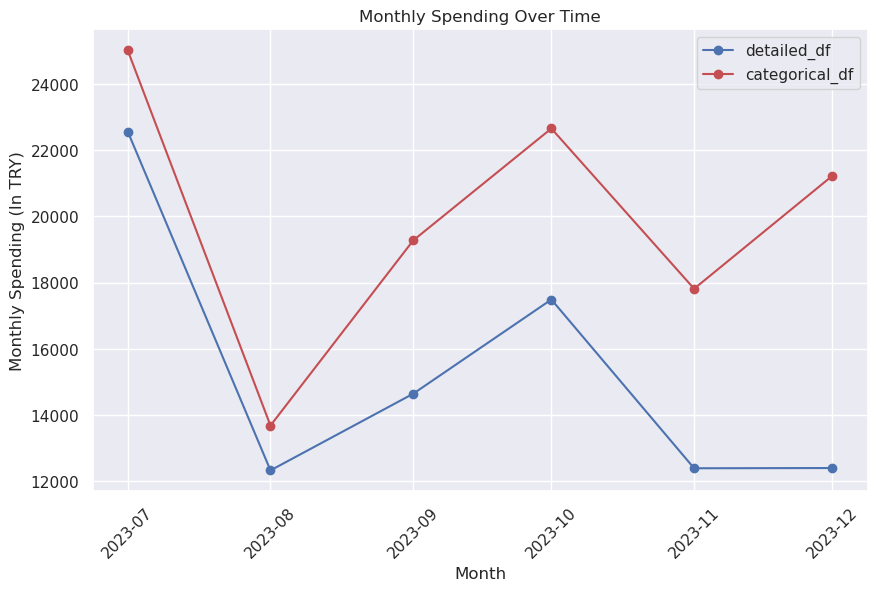

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_spending['Date'], monthly_spending['Amount'], marker='o', linestyle='-', color='b',label="detailed_df")
plt.plot(categorical_df.index, total_spending_per_month, marker='o', linestyle='-', color='r',label="categorical_df")
plt.xlabel('Month')
plt.ylabel('Monthly Spending (In TRY)')
plt.title('Monthly Spending Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

Here we see that our two dataframes do not give the same amount of monthly spending. This was something I rather anticipated when extracting the data, because not everything was to be seen on detailed categorization. But I still wanted to make sure. So this comparison was necessary

Still, our data passes the sanity check (total amount in detailed_df never exceeds the one of categorical_df). To make things more accurate, I am going to be using the total spending amount from categorical_df in our final dataframe (df)

In [27]:
df['Month_Total'] = df['Date'].map(categorical_df['Month_Total'])

In [28]:
df.sample(n=5)

,Date,Category,Corporation,Amount,Corporation_Total,Corporation_Category,Month_Total
60,2023-10-01,Clothes,TRENDYOL,828.0,7528.0,2,22648.00
114,2023-07-01,Groceries,MİGROS,2714.0,8025.0,2,25005.00
33,2023-11-01,Fuel,PETROL OFİSİ,113.0,113.0,0,17811.97
38,2023-11-01,Groceries,SU SARKUTERI,247.0,2416.0,1,17811.97
15,2023-12-01,Clothes,ZARA,1534.0,2798.0,1,21218.46


# More Feature Engineering

### Adding "Spending Habit" parameters to our Data

**Spending in Chunks** vs **Spend Sparingly**:

Here we created 3 more columns, which serve the purpose of determining if I tend spend in small quantities, or in larger quantities. 
For each month, there is now data for my spending habit of each corporation for that month, spending habit for that month in general and the spending habit of each category. 

Example: In December 2023, I may have been spending in chunks for food and entertainment, but spending in smaller quantities for a particular company in that category.

Mapping: 

**Spending in Chunks**: 1

**Spending Sparingly**: 0

The amount thershold is 800 TRY

In [29]:
amount_threshold = 800

#df['Spending_Habit_Date'] = df.groupby('Date')['Amount'].transform(lambda x: (x > amount_threshold).mean() > 0.5).astype(int)
df['Spending_Habit_Category'] = df.groupby(['Date', 'Category'])['Amount'].transform(lambda x: (x > amount_threshold).mean() > 0.5).astype(int)
df['Spending_Habit_Corporation'] = df.groupby(['Date', 'Corporation'])['Amount'].transform(lambda x: (x > amount_threshold).mean() > 0.5).astype(int)

df.sample(n=5)

,Date,Category,Corporation,Amount,Corporation_Total,Corporation_Category,Month_Total,Spending_Habit_Category,Spending_Habit_Corporation
121,2023-07-01,Clothes,DOLAP,45.0,45.0,0,25005.00,0,0
71,2023-09-01,Food and Entertainment,COCO CHEF,173.0,173.0,0,19271.00,0,0
4,2023-12-01,Food and Entertainment,YUKSELEN YILDIZ TURIZM,704.0,1702.0,0,21218.46,0,0
21,2023-11-01,Food and Entertainment,TRENDYOL,1209.0,7528.0,2,17811.97,0,1
56,2023-10-01,Groceries,DOGA TEKEL,112.0,112.0,0,22648.00,0,0


### Adding "Season" and "School Month" Columns to Our Data

In [30]:
df['Season'] = df['Date'].dt.month.map({7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})
df['Season_Num'] = df['Season'].map({'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4})
df['School_Month'] = ((df['Date'].dt.month >= 10) | (df['Date'].dt.month < 6)).astype(int)

In [31]:
df.sample(n=5)

,Date,Category,Corporation,Amount,Corporation_Total,Corporation_Category,Month_Total,Spending_Habit_Category,Spending_Habit_Corporation,Season,Season_Num,School_Month
69,2023-09-01,Food and Entertainment,MASHA MESHE,258.0,258.0,0,19271.00,0,0,Fall,4,0
13,2023-12-01,Food and Entertainment,MURAT KAVUNCU ISTANBUL,175.0,175.0,0,21218.46,0,0,Winter,1,1
64,2023-09-01,Food and Entertainment,STARBUCKS,650.0,4322.0,1,19271.00,0,0,Fall,4,0
30,2023-11-01,Food and Entertainment,PIAZZA,145.0,145.0,0,17811.97,0,0,Fall,4,1
94,2023-08-01,Food and Entertainment,KUCUK EV SABANCI,174.0,2849.0,1,13684.00,0,0,Summer,3,0


### Showing Correlations Between Columns

In [32]:
category_mapping = {
    'Food and Entertainment': 1,
    'Groceries': 2,
    'Electronics': 3,
    'Health and Care': 4,
    'Education and Hobbies': 5,
    'Clothes': 6,
    'Transportation and Travel': 7,
    'Fuel': 8,
    'Services': 9,
    'Home and Decor': 10
}

df['Category_Num'] = df['Category'].replace(category_mapping)

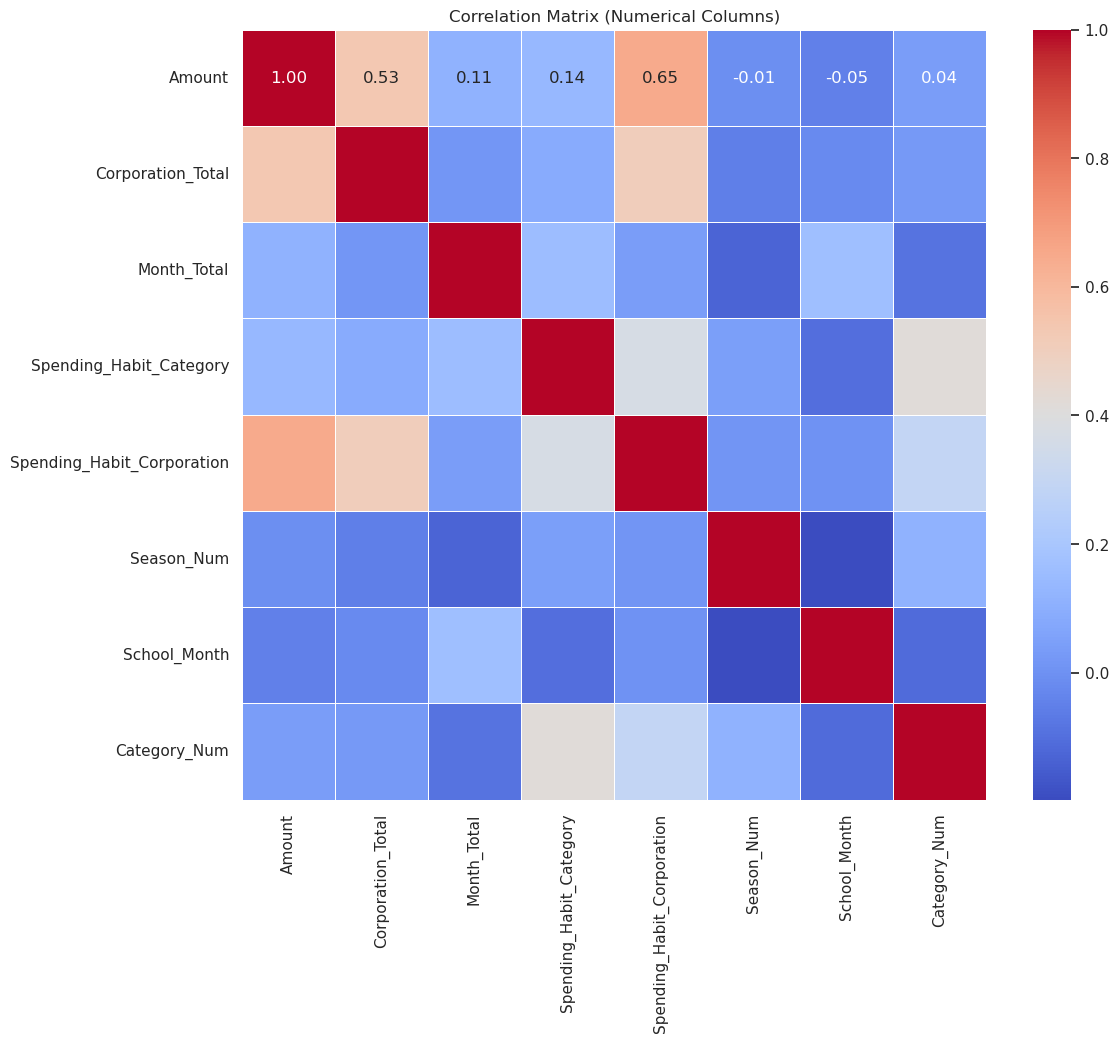

In [33]:
correlation_matrix = df.select_dtypes(include='number').corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

In [34]:
correlation_threshold = 0.2
mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)

strongly_correlated_pairs = (correlation_matrix.mask(mask).unstack().sort_values(ascending=False).reset_index().rename(columns={0: 'Correlation'}).query(f'abs(Correlation) > {correlation_threshold} and abs(Correlation) < 1.0'))

print("Strongly Correlated Pairs (Excluding 1.0 values):")
print(strongly_correlated_pairs)

Strongly Correlated Pairs (Excluding 1.0 values):
                       level_0                     level_1  Correlation
8                       Amount  Spending_Habit_Corporation     0.646405
9                       Amount           Corporation_Total     0.533284
10           Corporation_Total  Spending_Habit_Corporation     0.505276
11     Spending_Habit_Category                Category_Num     0.417652
12     Spending_Habit_Category  Spending_Habit_Corporation     0.369952
13  Spending_Habit_Corporation                Category_Num     0.290565


**Comments:**

The positive correlation between Amount and spending habits related to corporations may suggest that higher overall spending is associated with more consistent spending habits, particularly related to corporations.

Correlation between Spending_Habit_Category and Category_Num, is not surprising, given the small amount of categories. 

Most of the strong correlations make sense and are related to amount spent. Which is kinda sad, because it would be super cool to find a correlation between school months, seasons and my spending habits to be honest.

## Training Machine Learning Model to Predict Next Months Spending with categorical_df

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

Remember our dataframe

In [36]:
categorical_df

,Food and Entertainment,Groceries,Electronics,Health and Care,Education and Hobbies,Clothes,Transportation and Travel,Fuel,Services,Home and Decor,Month_Total
Date,,,,,,,,,,,
2023-12-01,8953.7,4586.02,2809.0,1797.79,1572.96,1385.99,0.0,113.0,0.0,0.00,21218.46
2023-11-01,7490.7,2425.48,0.0,1000.00,1194.97,1892.17,119.0,3056.0,553.5,80.15,17811.97
2023-10-01,13420.0,2475.00,0.0,116.00,1443.00,2093.00,1806.0,1295.0,0.0,0.00,22648.00
2023-09-01,6740.0,3398.00,0.0,2157.00,133.00,0.00,2286.0,4557.0,0.0,0.00,19271.00
2023-08-01,8125.0,2328.00,0.0,0.00,129.00,1105.00,1997.0,0.0,0.0,0.00,13684.00
2023-07-01,12180.0,9712.00,0.0,1035.00,168.00,1693.00,217.0,0.0,0.0,0.00,25005.00


In [37]:
categorical_df['Month'] = pd.to_datetime(categorical_df.index).month

X = categorical_df.drop('Month_Total', axis=1)
y = categorical_df['Month_Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)
len(X_train), len(X_test), len(y_train), len(y_test)

(4, 2, 4, 2)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

model = RandomForestRegressor(random_state=4)

model.fit(X_train.values, y_train)

predicted_expenses = model.predict(X_test.values)

print("Predicted Expenses for Next Month:", predicted_expenses[0])

Predicted Expenses for Next Month: 19462.752799999995


In [39]:
y_true = y_test.values
mae = mean_absolute_error(y_true, predicted_expenses)
print("Mean Absolute Error:", mae)
print("Error Percentage: ", y_true[0]/predicted_expenses[0])

Mean Absolute Error: 636.3556000000008
Error Percentage:  0.9901477040801754


### Hyperparameter Tuning for our Model

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150,400],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

model = RandomForestRegressor(random_state=4)

grid_search = GridSearchCV(model, param_grid, cv=2, scoring='neg_mean_absolute_error', n_jobs=-1)

grid_search.fit(X_train.values, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
predicted_expenses = best_model.predict(X_test.values)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


In [41]:
print("Predicted Expenses for Next Month:", predicted_expenses[0])

Predicted Expenses for Next Month: 19941.732200000006


In [42]:
y_true = y_test.values
mae = mean_absolute_error(y_true, predicted_expenses)
print("Mean Absolute Error:", mae)
print("Error Percentage: ", y_true[0]/predicted_expenses[0])

Mean Absolute Error: 973.7300000000014
Error Percentage:  0.966365399290639


### Comparing Our Models With Basic Statistical Techniques
Now we will compare our best_model's results with a basic statistical method, like taking the mean value of the data as the next months spending

In [43]:
the_mean= categorical_df["Month_Total"].mean()
the_mean

19939.738333333335

In [44]:
print("Mean Absolute Error:", mean_absolute_error([y_true[0]], [the_mean]))
print("Error Percentage: ", y_true[0]/the_mean)

Mean Absolute Error: 668.7383333333346
Error Percentage:  0.9664620306368112


**Comments**: Surprisingly, the "base" model, outperformed the hyperparameter-tuned model.
This is probably due to a few reasons: 

Our dataset is quite small. It might have been unsufficient for GridSearch to find good patterns. Another possibility, is similarly, due to dataset being very small, our model could easily been overfitted. It is so bad that, our basic "mean" method outperformed it.

### Predicting the Spending Category from our extended dataframe

Remember our dataframe

In [45]:
df.sample(n=5)

,Date,Category,Corporation,Amount,Corporation_Total,Corporation_Category,Month_Total,Spending_Habit_Category,Spending_Habit_Corporation,Season,Season_Num,School_Month,Category_Num
118,2023-07-01,Groceries,MUTLU DONDURMA,180.0,360.0,0,25005.0,1,0,Summer,3,0,2
111,2023-07-01,Food and Entertainment,WALKERS COFFEE,115.0,115.0,0,25005.0,0,0,Summer,3,0,1
89,2023-08-01,Food and Entertainment,PROMİL BEACH,1745.0,10092.0,2,13684.0,0,1,Summer,3,0,1
79,2023-09-01,Fuel,EKKA PETROL,800.0,1052.0,0,19271.0,0,0,Fall,4,0,8
67,2023-09-01,Food and Entertainment,TRENDYOL,304.0,7528.0,2,19271.0,0,0,Fall,4,0,1


Dropping already mapped columns for our model to work better


In [46]:
columns_to_drop = ['Category', 'Season','Corporation']
df1 = df.copy()
df1 = df1.drop(columns=columns_to_drop)

Trying 4 models to select a few to hyperparameter tune

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df1.drop('Category_Num', axis=1)
X['Date'] = pd.to_datetime(X['Date'])
X['Month_Float'] = X['Date'].dt.month.astype(float)
X = X.drop(columns=['Date'])
y = df1['Category_Num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=700)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=700)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=700)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Support Vector Machine (SVM)
svm_model = SVC(random_state=700)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=700)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")


Decision Tree Accuracy: 0.84
Random Forest Accuracy: 0.76
SVM Accuracy: 0.64
Gradient Boosting Accuracy: 0.64


### Hyperparameter-Tuning Decision Tree and Random Forest 

In [66]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=700), param_grid_dt, cv=2)
grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print(f"Best DT Accuracy: {accuracy_best_dt}")
print(f"Best DT Hyperparams: {grid_search_dt.best_params_}")

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=700), param_grid_rf, cv=2)
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Best RF Accuracy: {accuracy_best_rf}")
print(f"Best RF Hyperparams: {grid_search_rf.best_params_}")

Best DT Accuracy: 0.8
Best DT Hyperparams: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best RF Accuracy: 0.8
Best RF Hyperparams: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


**Comments**: The Random Forest model improved, while Decision Tree model regressed. The reasons might be similar to our other experiment, ie. Overfitting. But it's hard to know just from this small example.


## Conclusions

Overall, this project was one I certainly enjoyed doing. Even though the inital dataset was rather small, I enjoyed expanding, and visualizing my own data. 

The resulting models from my experiments performed in a rate that is acceptable, especially the category prediction.

If I had the chance, I would like to re-do this experiment with data that is years long, which might've provided better insights.